# Ride Share Dataset

**Ride Share(Boston) Dataset Glossary**

|Variable|Description|
|---|---|
|Distance|Distance Between Source and Destination|
|cab_type|Uber or Lyft|
|time_stamp|epoch time when data was queried|
|destination|destination of the ride|
|source|the starting point of the ride|
|price|price estimated for the ride in USD|
|surge_multiplier|the multiplier by which price was increased, default 1|
|id|unique identifier|
|product_id|uber/lyft identifier for cab-type|
|name|visible type of the cab eg: Uber Pool, UberXL|


# **Import Libraries and Dataset**

## Import Libraries

In [30]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Import Dataset

In [31]:
#import data as a pandas dataframe

# Access the .csv file in Google Drive folder. The file path must be correct
data = pd.read_csv('cab_rides.csv')

# **Data Check**

Convert "timestamp" to a datetime datatype

In [32]:
#Convert "timestamp" to a datetime datatype
data['date'] = pd.to_datetime(data['time_stamp'],unit='ms')
data = data.drop(['time_stamp'], axis=1)
data

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date
0,0.440,Lyft,North Station,Haymarket Square,5.000,1.000,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890
1,0.440,Lyft,North Station,Haymarket Square,11.000,1.000,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677
2,0.440,Lyft,North Station,Haymarket Square,7.000,1.000,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198
3,0.440,Lyft,North Station,Haymarket Square,26.000,1.000,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749
4,0.440,Lyft,North Station,Haymarket Square,9.000,1.000,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223
...,...,...,...,...,...,...,...,...,...,...
693066,1.000,Uber,North End,West End,13.000,1.000,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.534
693067,1.000,Uber,North End,West End,9.500,1.000,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.534
693068,1.000,Uber,North End,West End,NaN,1.000,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 23:53:05.534
693069,1.000,Uber,North End,West End,27.000,1.000,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.534


In [33]:
# Bin datetime to hours
data['hourly_bins'] = pd.cut(data['date'], bins=pd.date_range(start=data['date'].min(), end=data['date'].max(), freq='H'))
data['hours'] = data['hourly_bins'].apply(lambda x: x.left.hour)
data = data.drop('hourly_bins', axis=1)
map = {0.000:"12:00AM",1.000:"1:00AM",2.000:"2:00AM",3.000:"3:00AM",4.000:"4:00AM",5.000:"5:00AM",6.000:"6:00AM",7.000:"7:00AM",8.000:"8:00AM",9.000:"9:00AM",10.000:"10:00AM",11.000:"11:00AM",12.000:"12:00PM",13.000:"1:00PM",14.000:"2:00PM",15.000:"3:00PM",16.000:"4:00PM",17.000:"5:00PM",18.000:"6:00PM",19.000:"7:00PM",20.000:"8:00PM",21.000:"9:00PM",22.000:"10:00PM",23.000:"11:00PM",24.000:"12:00PM"}
data["hours"].replace(map, inplace=True)
data

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hours
0,0.440,Lyft,North Station,Haymarket Square,5.000,1.000,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890,8:00AM
1,0.440,Lyft,North Station,Haymarket Square,11.000,1.000,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677,1:00AM
2,0.440,Lyft,North Station,Haymarket Square,7.000,1.000,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198,12:00AM
3,0.440,Lyft,North Station,Haymarket Square,26.000,1.000,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749,4:00AM
4,0.440,Lyft,North Station,Haymarket Square,9.000,1.000,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223,3:00AM
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.000,Uber,North End,West End,13.000,1.000,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.534,11:00PM
693067,1.000,Uber,North End,West End,9.500,1.000,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.534,11:00PM
693068,1.000,Uber,North End,West End,NaN,1.000,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 23:53:05.534,11:00PM
693069,1.000,Uber,North End,West End,27.000,1.000,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.534,11:00PM


### Add Trip Column

In [34]:
data["Trip"] = data["source"] +"-"+ data['destination']
data["Trip"].value_counts(normalize=True)*100


Trip
Financial District-South Station   1.494
South Station-Financial District   1.494
Back Bay-North End                 1.475
North End-Back Bay                 1.475
West End-Fenway                    1.467
                                    ... 
West End-North End                 1.328
Haymarket Square-West End          1.321
West End-Haymarket Square          1.321
South Station-North Station        1.321
North Station-South Station        1.320
Name: proportion, Length: 72, dtype: float64

## Price With Surge

In [35]:
data["Price With Surge"] = data["price"] * data["surge_multiplier"]
data[data["surge_multiplier"] > 1]

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hours,Trip,Price With Surge
266,1.080,Lyft,Theatre District,South Station,34.000,1.250,157ab8b3-07a5-4b3b-a2b9-4d3d6f9206c5,lyft_luxsuv,Lux Black XL,2018-12-03 14:32:57.735,1:00PM,South Station-Theatre District,42.500
268,1.080,Lyft,Theatre District,South Station,9.000,1.250,8bc00ba0-9ccc-4038-aa80-14ec69433988,lyft,Lyft,2018-12-13 12:00:03.813,11:00AM,South Station-Theatre District,11.250
269,1.080,Lyft,Theatre District,South Station,13.500,1.250,b4c3be54-c6f4-40b6-8c38-ea7640dd60fa,lyft_plus,Lyft XL,2018-12-18 03:10:08.299,2:00AM,South Station-Theatre District,16.875
270,1.080,Lyft,Theatre District,South Station,19.500,1.250,c4adda82-6f50-47b4-a316-2aa415057e0a,lyft_lux,Lux Black,2018-12-16 17:40:12.797,4:00PM,South Station-Theatre District,24.375
271,1.080,Lyft,Theatre District,South Station,16.500,1.250,ef413b70-21c2-493e-a86f-70abff25a2ee,lyft_premier,Lux,2018-11-27 21:33:23.593,8:00PM,South Station-Theatre District,20.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692787,1.000,Lyft,North End,Financial District,13.500,1.250,1372137e-1332-4b76-ab98-da4c2de8e1b8,lyft_plus,Lyft XL,2018-11-28 16:59:07.602,4:00PM,Financial District-North End,16.875
692789,1.000,Lyft,North End,Financial District,16.500,1.250,6d2bc394-8d08-4a60-acec-b1ed898e7a2f,lyft_premier,Lux,2018-11-28 16:59:07.602,4:00PM,Financial District-North End,20.625
692790,1.000,Lyft,North End,Financial District,22.500,1.250,7829341f-a619-42c2-a86e-a4d7b64060d7,lyft_lux,Lux Black,2018-11-28 16:59:07.602,4:00PM,Financial District-North End,28.125
692791,1.000,Lyft,North End,Financial District,9.000,1.250,d2e2803b-19ac-4e82-a252-2a6aa8444c24,lyft,Lyft,2018-11-28 16:59:07.602,4:00PM,Financial District-North End,11.250


# **Exploratory Data Analysis**

## **Univariate Analysis**

### Question 6: Plot Histograms and Box Plots For Each Of the Values With Numerical Values

#### Distance

<Axes: xlabel='distance'>

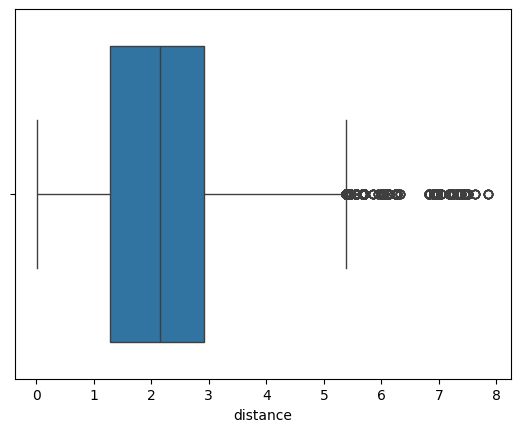

In [36]:
sns.boxplot(data = data, x = 'distance')

<Axes: xlabel='distance', ylabel='Count'>

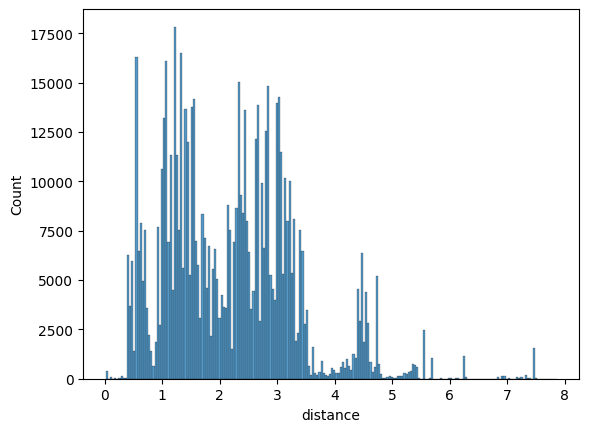

In [37]:
sns.histplot(data = data, x = 'distance')

#### Price

<Axes: xlabel='Price With Surge'>

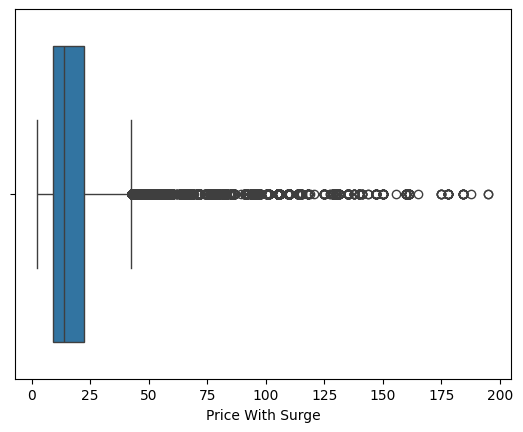

In [38]:
sns.boxplot(data = data, x = 'Price With Surge')

<Axes: xlabel='Price With Surge', ylabel='Count'>

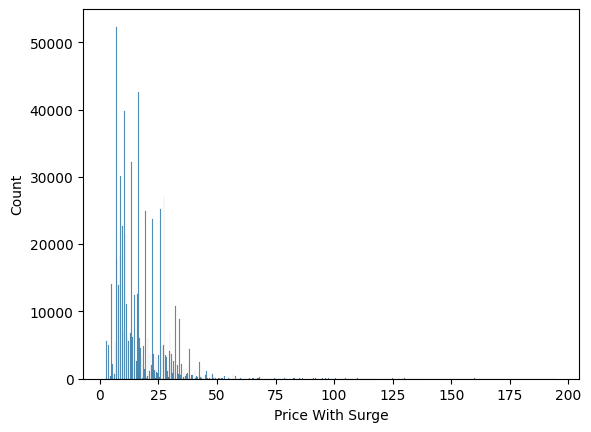

In [39]:
sns.histplot(data = data, x = 'Price With Surge')

#### Surge Multiplier

<Axes: xlabel='surge_multiplier'>

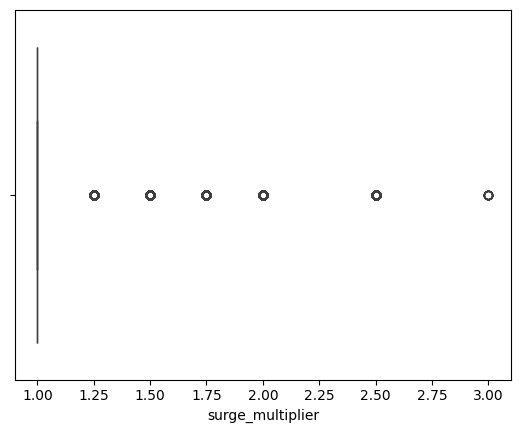

In [40]:
sns.boxplot(data = data, x = 'surge_multiplier')

<Axes: xlabel='surge_multiplier', ylabel='Count'>

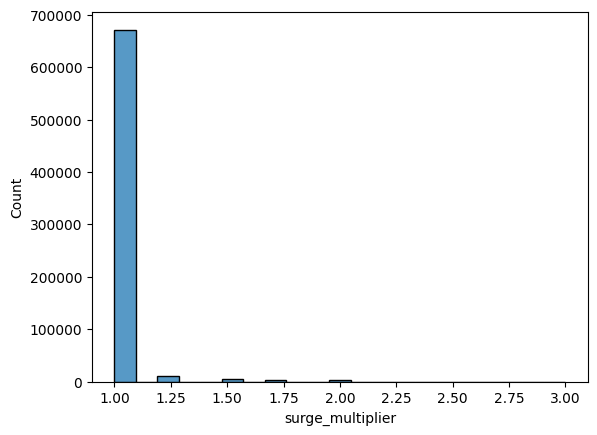

In [41]:
sns.histplot(data = data, x = 'surge_multiplier')

## Handle Missing and Erroneous Values

In [42]:
data[data["distance"]> 5.5]

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hours,Trip,Price With Surge
515,7.460,Uber,Northeastern University,Financial District,NaN,1.000,797848bb-3e80-41a2-a997-ffdc294530eb,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-11-29 02:06:47.446,1:00AM,Financial District-Northeastern University,NaN
516,7.460,Uber,Northeastern University,Financial District,16.000,1.000,eeae82c8-83e0-44e8-bf70-8e5eb8fb83e4,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-14 20:15:05.606,7:00PM,Financial District-Northeastern University,16.000
1977,5.560,Uber,Boston University,Financial District,12.500,1.000,4346c8f4-c5f8-40b3-9e08-24104f0719ef,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-12-16 23:50:09.247,11:00PM,Financial District-Boston University,12.500
1978,5.560,Uber,Boston University,Financial District,15.000,1.000,4e9681fe-f88b-42d5-9fc1-5d2282846777,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-17 03:30:08.176,2:00AM,Financial District-Boston University,15.000
1979,5.560,Uber,Boston University,Financial District,15.000,1.000,75d0f44f-3985-467d-a8a4-1df97c2e8d25,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-16 16:50:06.964,4:00PM,Financial District-Boston University,15.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693005,7.360,Uber,North End,Back Bay,14.500,1.000,1d31ef5f-2637-46e0-93cf-8d0fe3073b17,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-30 05:23:02.308,4:00AM,Back Bay-North End,14.500
693006,7.360,Uber,North End,Back Bay,36.000,1.000,39544c00-20c2-4a8c-9248-5818d37c4af9,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-13 18:15:03.573,5:00PM,Back Bay-North End,36.000
693007,7.360,Uber,North End,Back Bay,49.500,1.000,c12672b4-2a17-422a-a72f-815d4ed75281,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-13 18:15:03.573,5:00PM,Back Bay-North End,49.500
693008,7.360,Uber,North End,Back Bay,16.000,1.000,c20c7f8f-036c-41ec-9f08-dd19576cc324,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-13 18:15:03.573,5:00PM,Back Bay-North End,16.000


# Distance Outlier Analysis

#### There seems to be no mistakes in the inputting of the distance data, the distances that are outliers are all consistent with their respective trip. The outliers are also a very small portion of the entire data, which means they won't skew the data much, and they are representative of real trips that occur. There are no entries with the distance value missing, which means there is no imputing needed.

In [43]:
data2 = data[data["Price With Surge"].isnull()]
data2[data2['cab_type']=='Lyft']

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hours,Trip,Price With Surge


In [44]:
data[data['Price With Surge']> 170]

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hours,Trip,Price With Surge
28083,3.890,Lyft,Financial District,Fenway,92.000,2.000,edb9ba13-b129-487f-be93-2e3abdd700a3,lyft_luxsuv,Lux Black XL,2018-11-28 21:41:35.635,9:00PM,Fenway-Financial District,184.000
38457,4.780,Lyft,Boston University,Theatre District,87.500,2.000,46e35c38-d89d-451c-97cd-aec7ce6136ce,lyft_luxsuv,Lux Black XL,2018-12-18 12:40:09.516,11:00AM,Theatre District-Boston University,175.000
56552,4.240,Lyft,Financial District,Fenway,89.000,2.000,3958e0d4-bc3f-4148-9c92-0c711f4b9474,lyft_luxsuv,Lux Black XL,2018-11-28 21:32:07.999,8:00PM,Fenway-Financial District,178.000
70465,4.530,Lyft,Financial District,Boston University,89.000,2.000,025b4780-6aa7-4b1b-bba4-84f373f99116,lyft_luxsuv,Lux Black XL,2018-12-14 04:40:11.556,3:00AM,Boston University-Financial District,178.000
71555,4.640,Lyft,Boston University,Theatre District,62.500,3.000,b72cc6c0-c0a1-4aaf-aa0a-b0fe2b64d0c8,lyft_plus,Lyft XL,2018-11-27 22:12:23.100,9:00PM,Theatre District-Boston University,187.500
71558,4.640,Lyft,Boston University,Theatre District,89.000,2.000,f5203125-b2fa-4e47-a072-0f85d48146f6,lyft_luxsuv,Lux Black XL,2018-12-14 14:45:11.214,2:00PM,Theatre District-Boston University,178.000
75919,3.750,Lyft,Financial District,Boston University,92.000,2.000,e0032a2b-c328-457e-adb5-79c3d83064a8,lyft_luxsuv,Lux Black XL,2018-12-13 17:15:14.374,4:00PM,Boston University-Financial District,184.000
108395,3.360,Lyft,Financial District,Fenway,89.000,2.000,a6b9bfaa-667c-40aa-9795-c4c4f7a55034,lyft_luxsuv,Lux Black XL,2018-12-18 07:10:14.491,6:00AM,Fenway-Financial District,178.000
172856,4.530,Lyft,Financial District,Boston University,87.500,2.000,a33a47db-9612-4bf7-9c9d-839140f93fa6,lyft_luxsuv,Lux Black XL,2018-12-17 18:30:10.317,5:00PM,Boston University-Financial District,175.000
271719,5.390,Lyft,Boston University,Financial District,92.000,2.000,6f17623a-f97c-4379-9188-4f3e07d1c48e,lyft_luxsuv,Lux Black XL,2018-11-29 01:02:08.714,12:00AM,Financial District-Boston University,184.000


# Price Outlier Analysis

##### The only entries with price missing are uber rides, but nothing else is missing in those entries, and there are no erroneuous values that are apparent in any way. There are no wildly erroneous prices, and the most expensive entries all occur with a high surge multiplier and are all exclusively Lyft's luxury vehicles. The values are consistent and it is not necessary to remove any entries.

In [45]:
data[data['surge_multiplier']> 2.5]

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hours,Trip,Price With Surge
71555,4.640,Lyft,Boston University,Theatre District,62.500,3.000,b72cc6c0-c0a1-4aaf-aa0a-b0fe2b64d0c8,lyft_plus,Lyft XL,2018-11-27 22:12:23.100,9:00PM,Theatre District-Boston University,187.500
71556,4.640,Lyft,Boston University,Theatre District,38.000,3.000,cb7f3543-7f95-4042-a20b-971d1d38acb4,lyft,Lyft,2018-12-16 23:40:18.739,10:00PM,Theatre District-Boston University,114.000
160088,2.300,Lyft,Haymarket Square,Back Bay,42.500,3.000,26f21ac1-edcc-4467-80e2-3d4676cbc0fe,lyft_plus,Lyft XL,2018-11-27 16:54:22.045,4:00PM,Back Bay-Haymarket Square,127.500
160091,2.300,Lyft,Haymarket Square,Back Bay,26.000,3.000,bcef8376-da26-4afd-8c32-e4f687a01824,lyft,Lyft,2018-11-27 16:54:22.045,4:00PM,Back Bay-Haymarket Square,78.000
289791,1.840,Lyft,South Station,Back Bay,22.500,3.000,29c15ed1-38be-4b26-846f-b51898b79419,lyft,Lyft,2018-11-27 09:03:21.922,8:00AM,Back Bay-South Station,67.500
289792,1.840,Lyft,South Station,Back Bay,38.000,3.000,bc4bb4d9-ff62-45c6-9d85-8593e6bd8a5f,lyft_plus,Lyft XL,2018-12-17 03:05:03.672,2:00AM,Back Bay-South Station,114.000
499099,3.160,Lyft,North End,Back Bay,55.000,3.000,6cc9f119-3263-42af-b919-355d23a55e31,lyft_plus,Lyft XL,2018-11-28 12:32:08.522,11:00AM,Back Bay-North End,165.000
499100,3.160,Lyft,North End,Back Bay,27.500,3.000,8840e1a9-b116-4c13-a34a-e31ba3fff549,lyft,Lyft,2018-11-28 12:32:08.522,11:00AM,Back Bay-North End,82.500
537448,4.390,Lyft,Financial District,Boston University,65.000,3.000,358f083b-e2b5-4a8c-b98c-497b046f6743,lyft_plus,Lyft XL,2018-11-27 04:42:21.898,4:00AM,Boston University-Financial District,195.000
537450,4.390,Lyft,Financial District,Boston University,38.500,3.000,737dafa2-da81-41bc-adbb-1b2ed5ca90da,lyft,Lyft,2018-12-14 03:40:07.486,2:00AM,Boston University-Financial District,115.500


In [46]:
data[data['surge_multiplier'].isnull()]

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,date,hours,Trip,Price With Surge


# Surge Multiplier Analysis

#### There are no missing surge multiplier values, and there are no values that are erroneous or that require removal.

### Question 7: Plot CountPlots For Columns With Catergorical Values

#### Cab Type

<Axes: xlabel='cab_type', ylabel='count'>

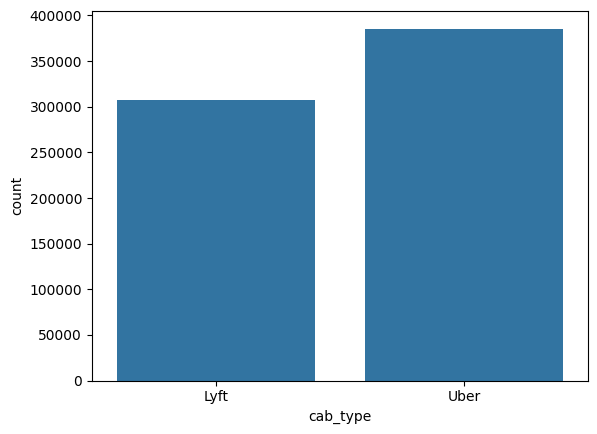

In [47]:
sns.countplot(data=data, x="cab_type")

#### Source

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Haymarket Square'),
  Text(1, 0, 'Back Bay'),
  Text(2, 0, 'North End'),
  Text(3, 0, 'North Station'),
  Text(4, 0, 'Beacon Hill'),
  Text(5, 0, 'Boston University'),
  Text(6, 0, 'Fenway'),
  Text(7, 0, 'South Station'),
  Text(8, 0, 'Theatre District'),
  Text(9, 0, 'West End'),
  Text(10, 0, 'Financial District'),
  Text(11, 0, 'Northeastern University')])

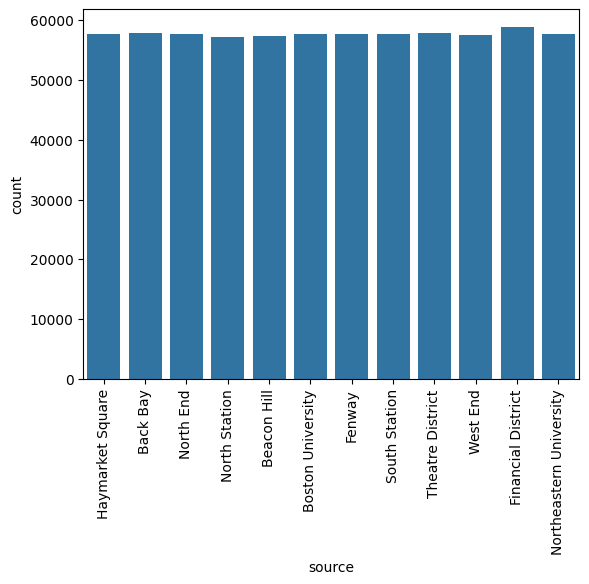

In [48]:
sns.countplot(data=data, x="source")
plt.xticks(rotation= 90)

#### Destination

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'North Station'),
  Text(1, 0, 'Northeastern University'),
  Text(2, 0, 'West End'),
  Text(3, 0, 'Haymarket Square'),
  Text(4, 0, 'South Station'),
  Text(5, 0, 'Fenway'),
  Text(6, 0, 'Theatre District'),
  Text(7, 0, 'Beacon Hill'),
  Text(8, 0, 'Back Bay'),
  Text(9, 0, 'North End'),
  Text(10, 0, 'Financial District'),
  Text(11, 0, 'Boston University')])

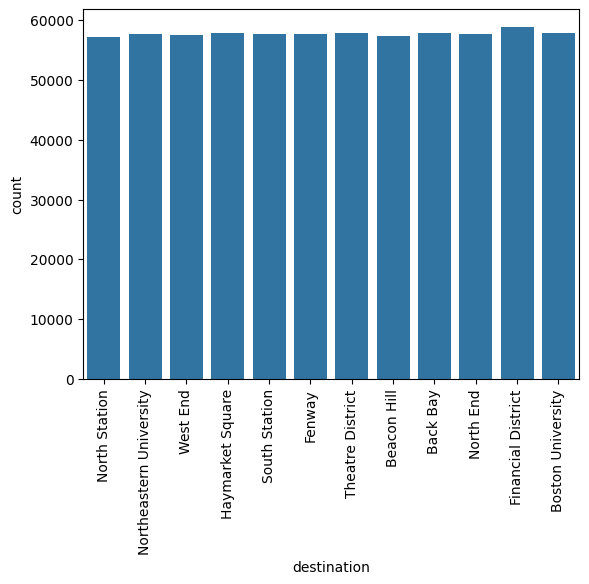

In [49]:
sns.countplot(data=data, x="destination")
plt.xticks(rotation= 90)

#### Name

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Shared'),
  Text(1, 0, 'Lux'),
  Text(2, 0, 'Lyft'),
  Text(3, 0, 'Lux Black XL'),
  Text(4, 0, 'Lyft XL'),
  Text(5, 0, 'Lux Black'),
  Text(6, 0, 'UberXL'),
  Text(7, 0, 'Black'),
  Text(8, 0, 'UberX'),
  Text(9, 0, 'WAV'),
  Text(10, 0, 'Black SUV'),
  Text(11, 0, 'UberPool'),
  Text(12, 0, 'Taxi')])

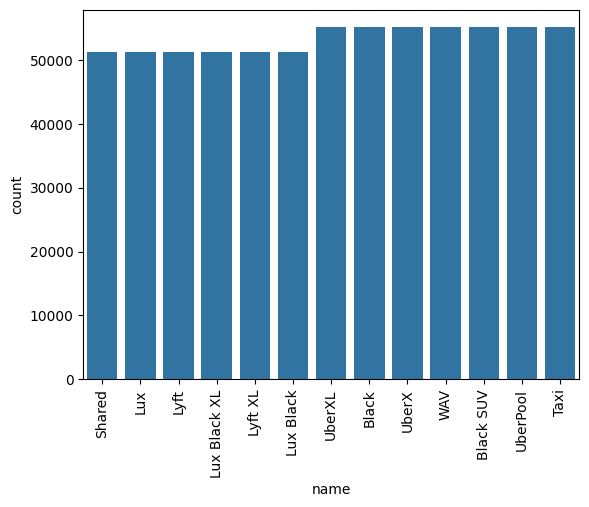

In [50]:
sns.countplot(data=data, x="name")
plt.xticks(rotation= 90)

Create countplot of the "trip" column

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71],
 [Text(0, 0, 'Haymarket Square-North Station'),
  Text(1, 0, 'Back Bay-Northeastern University'),
  Text(2, 0, 'North End-West End'),
  Text(3, 0, 'North Station-Haymarket Square'),
  Text(4, 0, 'Beacon Hill-South Station'),
  Text(5, 0, 'North Station-Northeastern University'),
  Text(6, 0, 'North Station-Fenway'),
  Text(7, 0, 'North Station-South Station'),
  Text(8, 0, 'Haymarket Square-West End'),
  Text(9, 0, 'Haymarket Square-Theatre District'),
  Text(10, 0, 'North End-Beacon Hill'),
  Text(11, 0, 'Haymarket Square-Beacon Hill'),
  Text(12, 0, 'Boston University-

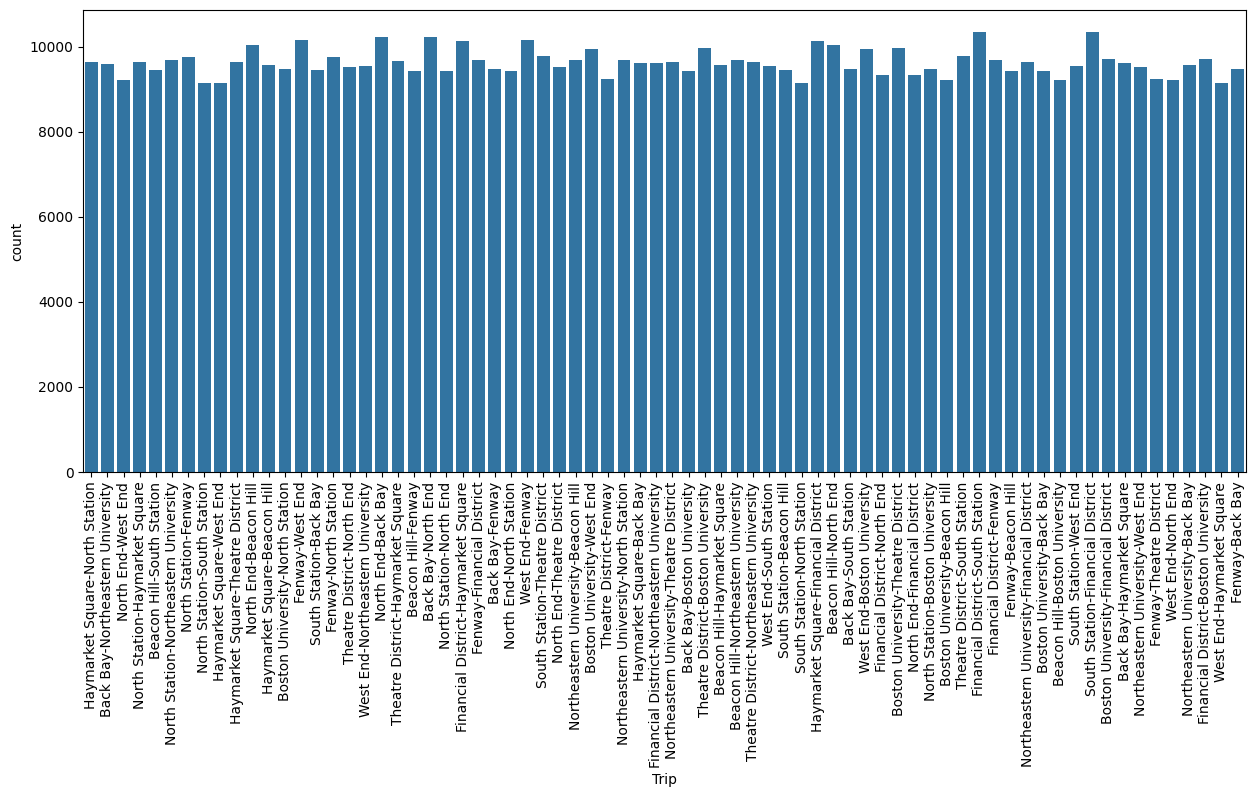

In [51]:
plt.figure(figsize = (15,6))
sns.countplot(data=data, x="Trip")
plt.xticks(rotation= 90)

Create a countplot, histogram, and boxplot for the new "hour" column

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '8:00AM'),
  Text(1, 0, '1:00AM'),
  Text(2, 0, '12:00AM'),
  Text(3, 0, '4:00AM'),
  Text(4, 0, '3:00AM'),
  Text(5, 0, '5:00PM'),
  Text(6, 0, '7:00PM'),
  Text(7, 0, '5:00AM'),
  Text(8, 0, '10:00AM'),
  Text(9, 0, '3:00PM'),
  Text(10, 0, '6:00PM'),
  Text(11, 0, '9:00PM'),
  Text(12, 0, '11:00PM'),
  Text(13, 0, '1:00PM'),
  Text(14, 0, '7:00AM'),
  Text(15, 0, '2:00AM'),
  Text(16, 0, '12:00PM'),
  Text(17, 0, '9:00AM'),
  Text(18, 0, '11:00AM'),
  Text(19, 0, '6:00AM'),
  Text(20, 0, '10:00PM'),
  Text(21, 0, '8:00PM'),
  Text(22, 0, '2:00PM'),
  Text(23, 0, '4:00PM')])

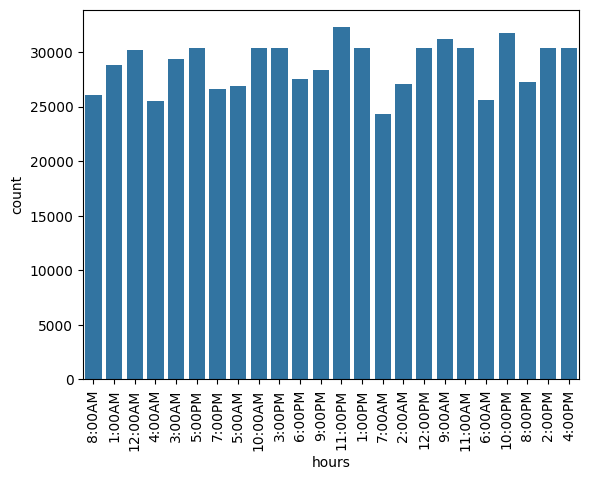

In [52]:
sns.countplot(data=data, x="hours")
plt.xticks(rotation= 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '8:00AM'),
  Text(1, 0, '1:00AM'),
  Text(2, 0, '12:00AM'),
  Text(3, 0, '4:00AM'),
  Text(4, 0, '3:00AM'),
  Text(5, 0, '5:00PM'),
  Text(6, 0, '7:00PM'),
  Text(7, 0, '5:00AM'),
  Text(8, 0, '10:00AM'),
  Text(9, 0, '3:00PM'),
  Text(10, 0, '6:00PM'),
  Text(11, 0, '9:00PM'),
  Text(12, 0, '11:00PM'),
  Text(13, 0, '1:00PM'),
  Text(14, 0, '7:00AM'),
  Text(15, 0, '2:00AM'),
  Text(16, 0, '12:00PM'),
  Text(17, 0, '9:00AM'),
  Text(18, 0, '11:00AM'),
  Text(19, 0, '6:00AM'),
  Text(20, 0, '10:00PM'),
  Text(21, 0, '8:00PM'),
  Text(22, 0, '2:00PM'),
  Text(23, 0, '4:00PM')])

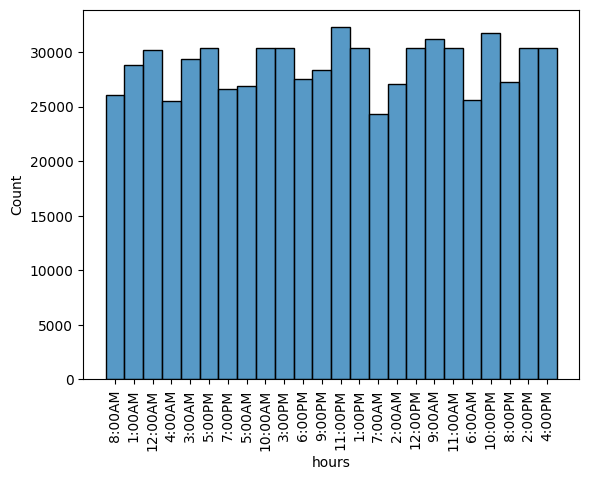

In [53]:
sns.histplot(data=data, x="hours")
plt.xticks(rotation= 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '8:00AM'),
  Text(1, 0, '1:00AM'),
  Text(2, 0, '12:00AM'),
  Text(3, 0, '4:00AM'),
  Text(4, 0, '3:00AM'),
  Text(5, 0, '5:00PM'),
  Text(6, 0, '7:00PM'),
  Text(7, 0, '5:00AM'),
  Text(8, 0, '10:00AM'),
  Text(9, 0, '3:00PM'),
  Text(10, 0, '6:00PM'),
  Text(11, 0, '9:00PM'),
  Text(12, 0, '11:00PM'),
  Text(13, 0, '1:00PM'),
  Text(14, 0, '7:00AM'),
  Text(15, 0, '2:00AM'),
  Text(16, 0, '12:00PM'),
  Text(17, 0, '9:00AM'),
  Text(18, 0, '11:00AM'),
  Text(19, 0, '6:00AM'),
  Text(20, 0, '10:00PM'),
  Text(21, 0, '8:00PM'),
  Text(22, 0, '2:00PM'),
  Text(23, 0, '4:00PM')])

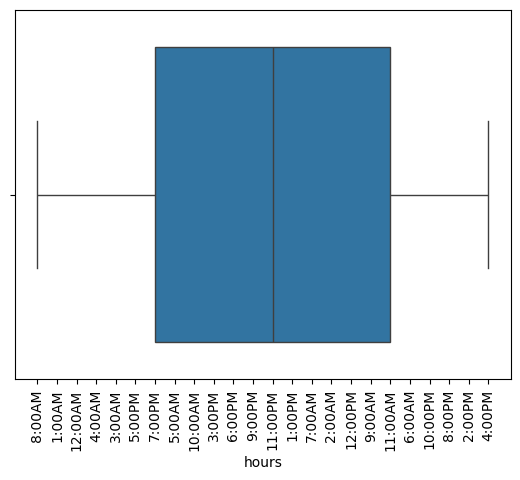

In [54]:
sns.boxplot(data=data, x="hours") 
plt.xticks(rotation= 90)

## **Bivariate Analysis**

### Question 8: Create A Heatmap For Columns Numerical Values

<Axes: >

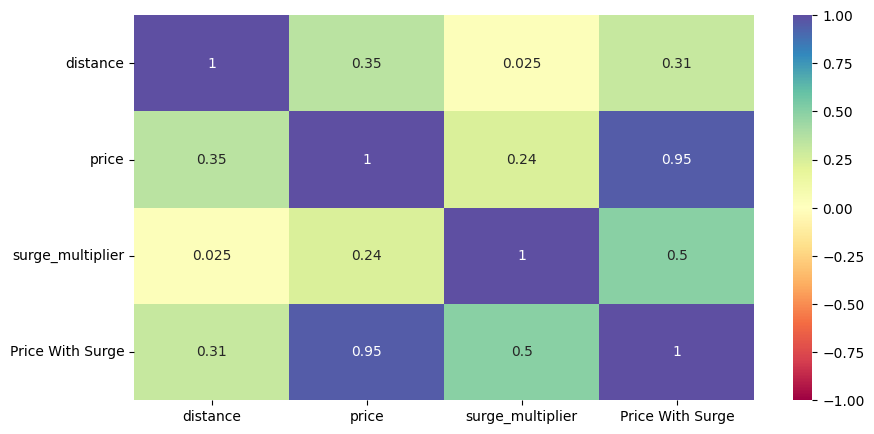

In [55]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_columns = data.select_dtypes(include=numerics)
plt.figure(figsize = (10,5))
sns.heatmap(numerical_columns.corr(), annot= True, cmap = 'Spectral', vmin = -1, vmax = 1)